# 对象引用、可变性和垃圾回收

## 变量不是盒子

*Python*使用引用式变量：变量和变量名是两个不同的东西。

在*Python*中，变量不是一个存储数据的盒子，而是一个针对盒子的标注。同时，一个盒子上可以有很多标注，也可以一个都没有。

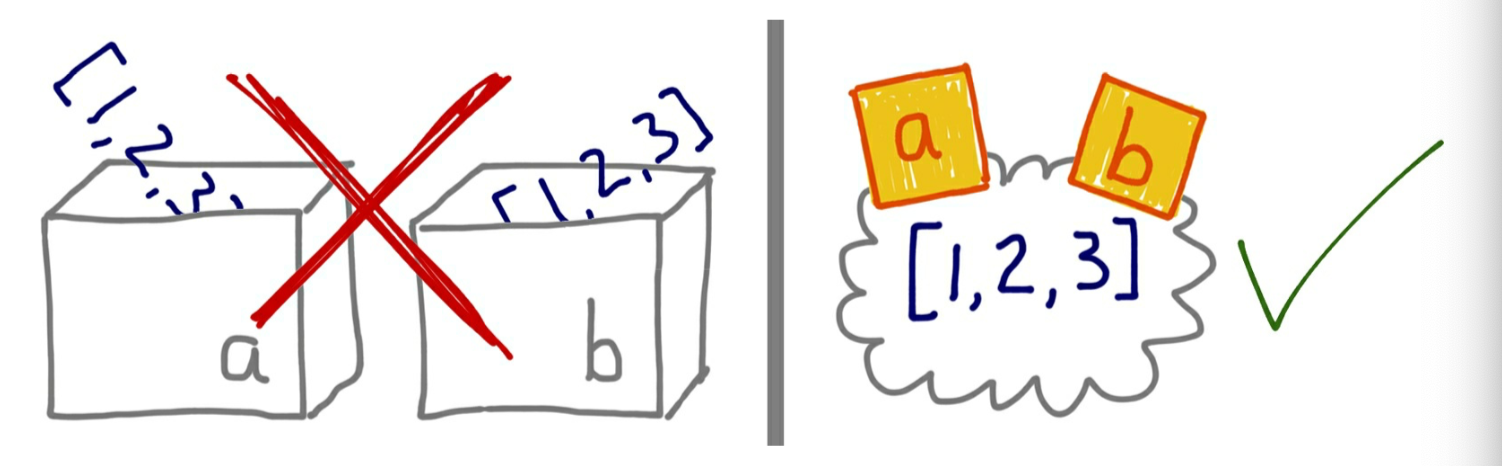

In [1]:
a = [1, 2, 3]
b = a
a.append(4)
print(b)

# 对象会在赋值之前创建
class Test:
    def __init__(self):
        print('ID', id(self))    # 在把 self 分配给 t 之前，self 就已经有了自己的 ID

t = Test()
print('Test', t, id(t))

[1, 2, 3, 4]
ID 4532984656
Test <__main__.Test object at 0x10e2fdb50> 4532984656


## 标识、相等性和别名

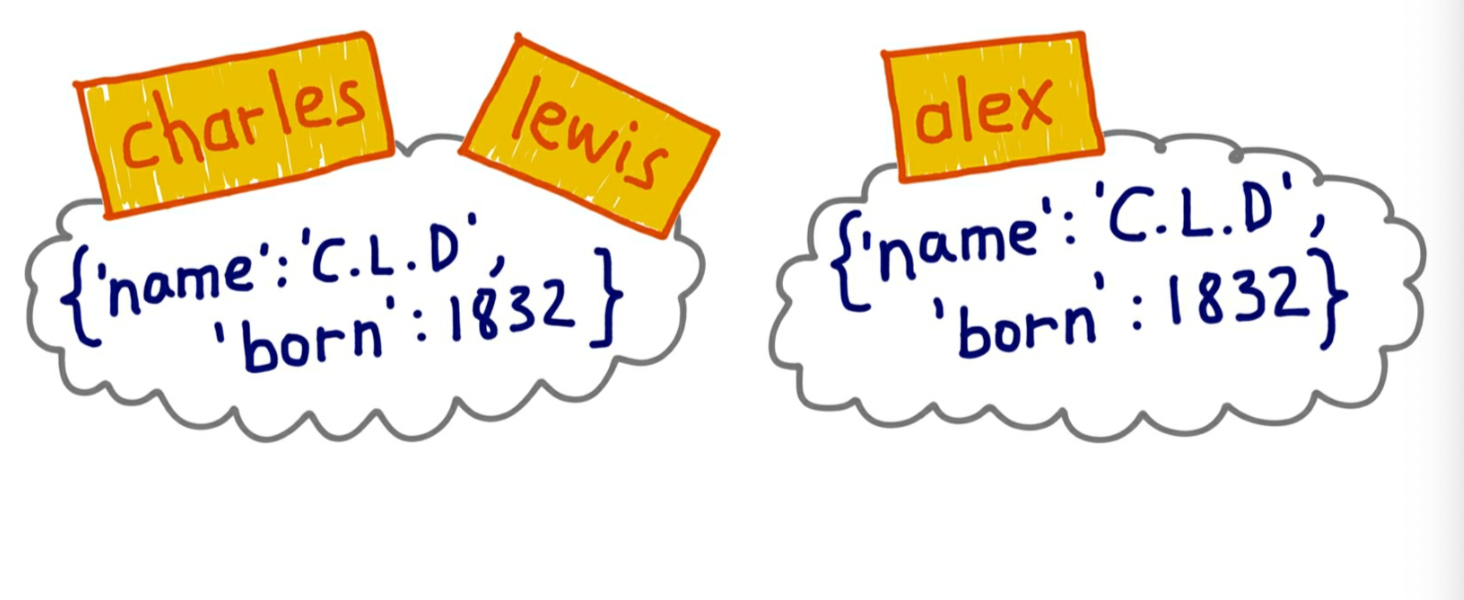

lewis 和 charles 是别名，即两个变量绑定同一个对象。
alex 和 charles 绑定的对象具有相同的值（== 比较的就是值）

在 *CPython* 中，id() 返回对象的内存地址，但在其他 Python 解释器中可能是别的值。关键是，ID 一定是唯一的数值标注，而且在对象的生命周期中绝不会变。  

编程中，我们很少会使用 `id()` 函数，标识最常使用 `is` 运算符检查相同性，而不是直接比较 ID.

### 在 == 和 is 之间选择

== 运算符比较两个对象的值(对象中保存的数据)，is 比较对象的标识。

变量和单例值之间比较应该使用 is。例如检查是否为 None

is 比 == 速度快，因为它不能重载。

In [2]:
# 与单例进行比较时，应该使用 is
a = None
assert a is None
b = ...
assert b is ...

# a == b 是语法糖，等同于 a.__eq__(b)

In [ ]:
# 分清“==”和“is”
# a is b 等同于 id(a) == id(b)
a = {'a': 1}
b = a
assert a is b
assert id(a) == id(b)

c = {'a': 1}
assert a == c
assert not a is c
assert id(a) != id(c)

a==b 等同于 a.__eq__(b)， 继承自 object 的 __eq__ 方法比较两个对象的 ID，多数情况下对象此方法可能会被覆盖，特别是大型集合和嵌套比较深的结构。

## 元祖的相对不可变性

元祖保存的是对象的引用。元祖的不可变指的是引用的不可变，与引用的对象无关。

元祖的值会随着引用的可变对象的改变而改变。元祖不可变的是元素的标识。

In [8]:
# 元组的相对不可变性
t1 = (1, 2, [30, 40])
t2 = (1, 2, [30, 40])
print(t1 == t2)

id1 = id(t1[-1])
t1[-1].append(50)
print(t1)

id2 = id(t1[-1])
print(id1 == id2)     # t1 的最后一个元素的标识没变，但是值变了
print(t1 == t2)

True
(1, 2, [30, 40, 50])
True
False


## 默认做浅复制

浅复制是指复制的是元素的引用。当存在可变元素时候

复制列表（或多数内置的可变集合）最简单的方式是使用内置的类型构造方法。

这种构造方法做的是浅复制。

In [13]:
# 浅复制
# Python 对列表等进行复制时，只会复制容器，而不会复制容器内的内容
a = [1, [2, 3], (4, 5, 6)]
b = list(a)
assert a == b
assert a is not b     # b 是一个新对象
assert a[1] is b[1]   # 但两个列表中的元素是同一个

a[1] += [4, 5]        # a[1] = a[1] + [4, 5], list 就地执行操作后返回对象本身的引用
b[2] += (7, 8)        # b[2] = b[2] + (7, 8), tuple 在执行操作后生成一个新对象并返回它的引用
print(a, b)

[1, [2, 3, 4, 5], (4, 5, 6)] [1, [2, 3, 4, 5], (4, 5, 6, 7, 8)]


### 对任意对象做深复制和浅复制



In [15]:
# 深复制
from copy import deepcopy
a = [1, [2, 3], (4, 5, 6)]
b = deepcopy(a)
assert a == b
assert a[1] is not b[1]      # 不单复制了容器，还复制了容器中的值

b[1].extend([4, 5])
print(a, b)
assert a != b

[1, [2, 3], (4, 5, 6)] [1, [2, 3, 4, 5], (4, 5, 6)]


## 函数的参数作为引用时

*Python* 唯一支持的参数传递模式是共享传参（call by sharing）。

共享传参指函数的各个形式参数获得实参中各个引用的副本。就是说函数内部的形参是实参的别名。

这样的结果是，函数可能会修改作为参数传入的可变对象，但无法修改这些对象的标识。

In [7]:
def f(a, b):
    a += b
    return a

x = 1
y = 2
f(x, y)
(x, y)

a = [1, 2]
b = [3, 4]
f(a, b)
a,b 

([1, 2, 3, 4], [3, 4])

### 不要使用可变类型作为函数的默认值

避免使用可变的对象作为参数的默认值。

In [20]:
class HauntedBus:
    
    def __init__(self, passengers=[]): # 这里默认值是一个空列表
        self.passengers = passengers
        
    def pick(self, name):
        self.passengers.append(name)
        
    def drop(self, name):
        self.passengers.remove(name)
        
bus1 = HauntedBus(['Alice', 'Bill'])
print(bus1.passengers)
bus1.pick('Charlie')
bus1.drop('Alice')
bus2 = HauntedBus()
bus2.pick('Carrie')
print(bus2.passengers)
bus3 = HauntedBus()
bus3.pick('Dave')

print(bus3.passengers)
print(bus2.passengers)

print(HauntedBus.__init__.__defaults__)

print(bus2.passengers is bus3.passengers)

print(bus1.passengers)


['Alice', 'Bill']
['Carrie']
['Carrie', 'Dave']
['Carrie', 'Dave']
(['Carrie', 'Dave'],)
True
['Bill', 'Charlie']


## 防御可变参数

如果定义的函数接收可变参数，应考虑调用方是否期望修改入参。

In [ ]:
basketball_team = ['Sue', 'Tina', 'Maya', 'Diana', 'Pat']
bus = TwilightBus(basketball_team)
b

In [19]:
# 共享传参导致的问题
# 可变参数作为函数默认值 & 跨作用域引用导致共享变量更改
class Container:
    def __init__(self, initial=[]):
        self.values = initial
    
    def add(self, value):
        self.values.append(value)

a = Container()
b = Container()
l = []
c = Container(l)
a.add(1)
b.add(2)
c.add(3)
print(a.values, b.values, c.values)
assert a.values is b.values            # a.values 和 b.values 共享同一个变量（init 函数中的默认值）
print(l)                               # l 和 c.values 共享同一个变量，c.values 更改后，l 也会更改
assert c.values is l

[1, 2] [1, 2] [3]
[3]


## del 和垃圾回收
> 对象绝不会自行销毁；然而，无法得到对象时，可能会被当做垃圾回收。

- `del` 语句删除标识而不是对象。

在 CPython 中，垃圾回收使用的主要算法时引用计数。当引用计数归零时，对象立即就被销毁。  

销毁时，CPython 会先调用对象的 `__del__` 方法，然后释放分配给对象的内存。  

CPython 2.0 增加了分代垃圾回收机制，用于检测循环引用中涉及的对象组。

In [20]:
# 监测引用计数垃圾回收
import weakref
s1 = s2 = {1}
ender = weakref.finalize(s1, lambda: print('Bye'))
print(ender.alive)
del s1                # 删除 s1 的引用
print(ender.alive)    # 对象 {1} 的引用还在（s2）
s2 = {2}
print(ender.alive)    # 无法引用到 {1} 对象，于是它被垃圾回收

True
True
Bye
False


## 弱引用

使用 `weakref.ref` 可以生成一个对象的引用，但不会增加它的引用计数

`weakref.ref` 类实际上是低层接口，多数程序最好使用 `weakref` 集合和 `finalize`. 不要自己手动创建并处理 `weakref.ref`实例

`weakref` 提供的弱引用集合有 `WeakKeyDictionary`, `WeakValueDictionary`, `WeakSet`.  
它们的用途可以从名字中得出。

弱引用的局限：并不是所有对象都可以创建弱引用，比如 `list`, `dict`, `str` 实例。  
但是，某些自定义类都可以创建弱引用（比如基于 `list` 生成的子类）。  
`int` 和 `tuple` 实例及它们的子类实例都不能成为弱引用的目标。

In [24]:
import weakref

s1 = {1}
ref = weakref.ref(s1)
print(ref, ref())
del s1
print(ref, ref())

<weakref at 0x00B10BD0; to 'set' at 0x00B35A08> {1}
<weakref at 0x00B10BD0; dead> None


# WeakValueDictionary 简介

`WeakValueDictionary` 类实现的是一种可变映射，里面的值是对象的弱引用。

被引用的对象在被垃圾回收后，对应的键将自动从 `WeakValueDictionary` 中删除，因此它经常用于缓存。

In [10]:
class Cheese:
    def __init__(self, kind):
        self.kind = kind
        
    def __repr__(self):
        return 'Cheese(%r)' % self.kind
    
import weakref
stock = weakref.WeakValueDictionary()
catalog = [Cheese('Red Leicsster'), Cheese('Tilsit'), Cheese('Brie'), Cheese('Parmesan')]

for cheese in catalog:
    stock[cheese.kind] = cheese
    
sorted(stock.keys())
del catalog
sorted(stock.keys())
del cheese
sorted(stock.keys())

[]

In [29]:
from weakref import WeakValueDictionary

weak_dict = WeakValueDictionary()
s1, s2 = {1}, {2}
weak_dict.update({
    's1': s1,
    's2': s2
})
print(list(weak_dict.items()))
del s2
print(list(weak_dict.items()))

[('s1', {1}), ('s2', {2})]
[('s1', {1})]


## 一些杂事
如果不可变集合（如 `tuple` 和 `frozenset`）中保存的是可变元素的引用，那么可变元素的值发生变化后，不可变集合也会发生改变。  
这里指的是 `hash` 和 `==`的结果，即使集合中的对象更改，该对象在集合中存储的引用也是不会变的。

`tuple()` 的参数如果是一个元组，则得到的是同一个对象。对元组使用 `[:]` 切片操作也不会生成新对象。  
`str`, `bytes` 和 `frozenset` 实例也有这种行为。  
`fs.copy()` 返回的是它本身（喵喵喵？）。

字符串字面量可能会产生**驻留**现象：两个相等的字符串共享同一个字符串对象。  
`int` 对象中，在 [-5, 256] 之间的整型实例也被提前创建，所有指向这些数字的引用均会共享对象。

自定义对象中，如果没有实现 `__eq__` 方法，则进行 `==` 判断时会比较它们的 ID.  
这种后备机制认为用户定义的类的各个实例是不同的。

In [32]:
a = "hahaha"
b = "hahaha"
assert a is b

a = 66
b = 66
assert a is b
a = 257
b = 257
assert a is not b

class T:
    pass

a = T()
b = a
c = T()
assert a is b
assert a is not c

## 延伸阅读
[Python Garbage Collector Implementations: CPython, PyPy and Gas](https://thp.io/2012/python-gc/python_gc_final_2012-01-22.pdf)